In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

In [288]:
# Load training data
df = pd.read_csv("C:/Users/user/OneDrive - Bar-Ilan University - Students/Documents/Data_mining/Final_Project/hotels_train.csv")

In [7]:
print("Shape: ", df.shape)
df.head()

Shape:  (27213, 18)


,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [9]:
df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
count,27213,27213.000000,27213.000000,27213,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000
unique,27213,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,553,NaN
top,INN09588,NaN,NaN,Room_Type 1,half board,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN
freq,1,NaN,NaN,21084,14591,NaN,NaN,NaN,NaN,NaN,NaN,14306,NaN,NaN,NaN,NaN,188,NaN
mean,NaN,0.812810,2.197332,NaN,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674
std,NaN,0.869317,1.403576,NaN,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000
50%,NaN,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000
75%,NaN,2.000000,3.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000


In [10]:
for col in df.columns:
    print(col, ': ', df[col].unique())

ID :  ['INN09588' 'INN07691' 'INN32192' ... 'INN22554' 'INN33957' 'INN31744']
weekend_nights :  [1 0 2 3 4 5 6 7]
week_nights :  [ 5  3  2  4  1  0  7  6 12 10  8  9 15 11 13 14 16 17]
room_type :  ['Room_Type 1' 'Room_Type 4' 'Room_Type 6' 'Room_Type 5' 'Room_Type 2'
 'Room_Type 7' 'Room_Type 3']
board_type :  ['half board' nan 'full board' 'breakfast' 'not selected']
n_adults :  [2 1 3 0 4]
n_less_12 :  [0 1 2 3 6]
n_more_12 :  [0 1 2 3 4]
booked_tour :  [0 1]
n_requests :  [2 0 1 3 5 4]
lead_time :  [ 34. 365. 148. 502.  32. 414. 168.  92.   9. 180. 309.   6.  23.  39.
 102.  27. 111.  50. 129.  75. 232. 335. 280. 178. 124.  93.  54. 266.
 137.  83.  64.   5.   2. 130. 336.  40.   4. 101. 108.  20.  17. 113.
  10. 138. 328.  69.  45.  98.  18. 147.   0. 256.  12. 321. 260.  36.
  42. 318. 114.  62.   3. 144. 387. 172. 231. 298.  33.  29. 122.  nan
 297.  14.  52. 226.  81.  35. 351. 230.  90. 362. 149.  68. 162. 245.
 216.  26. 106. 195.  15. 134. 363.  94. 332.  57.  58.  38. 141. 

In [11]:
numeric_col = df.describe().columns # to get the numeric column
numeric_col

Index(['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12',
       'booked_tour', 'n_requests', 'lead_time', 'n_p_cacellation',
       'n_p_not_cacellation', 'repeated', 'price', 'is_canceled'],
      dtype='object')

In [12]:
nominal_data = df.drop(numeric_col, axis=1)
nominal_data

,ID,room_type,board_type,purchase_type,date
0,INN09588,Room_Type 1,half board,Online,11/28/2018
1,INN07691,Room_Type 1,NaN,NaN,11/03/2018
2,INN32192,Room_Type 4,half board,Online,05/06/2018
3,INN32218,Room_Type 1,NaN,Offline,9/26/2018
4,INN02994,Room_Type 4,half board,Offline,10/19/2017
...,...,...,...,...,...
27208,INN09056,Room_Type 1,NaN,NaN,7/18/2018
27209,INN24796,Room_Type 1,half board,Online,2/24/2018
27210,INN22554,Room_Type 1,NaN,Offline,4/15/2018
27211,INN33957,Room_Type 4,half board,Aviation,5/22/2018


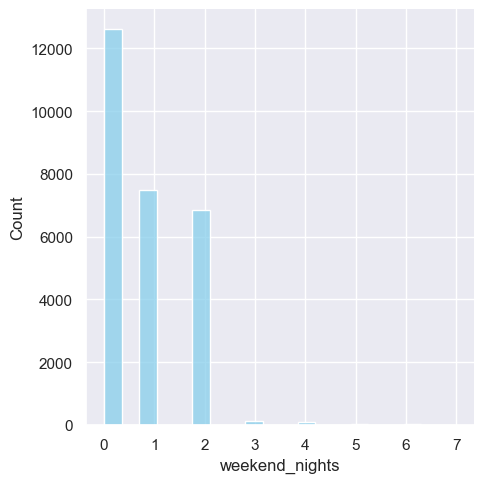

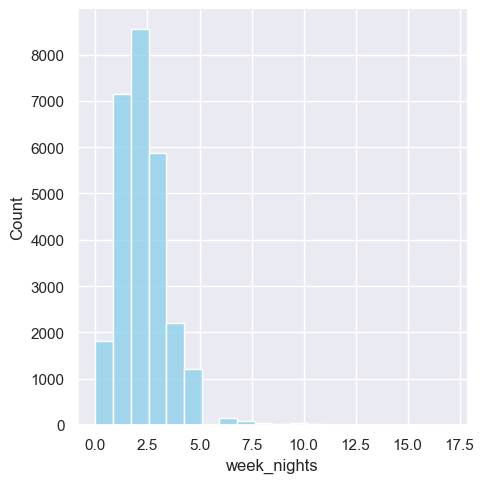

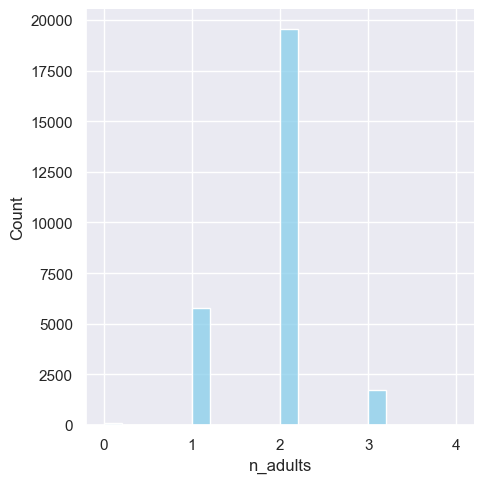

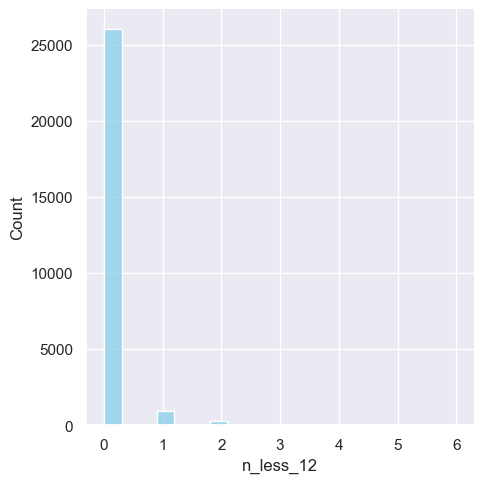

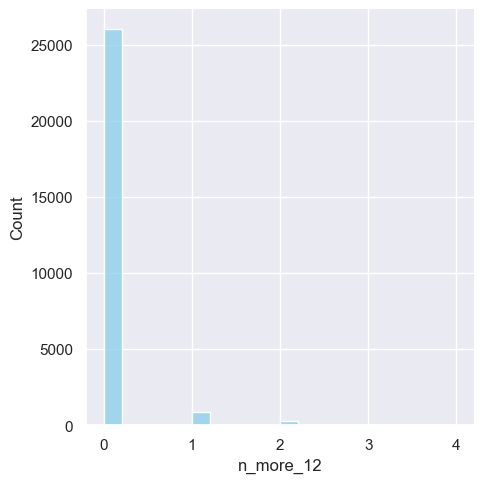

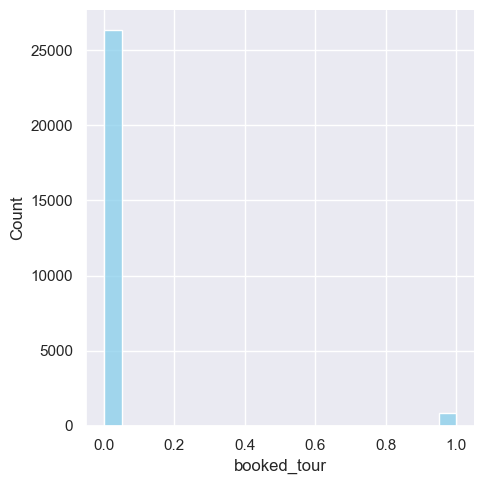

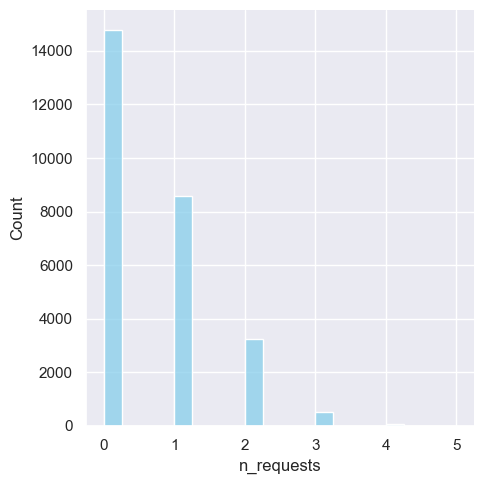

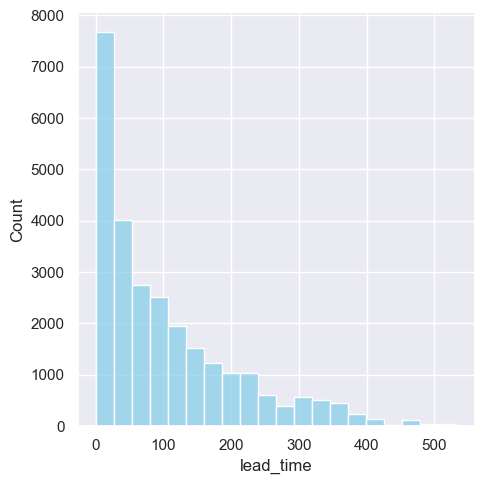

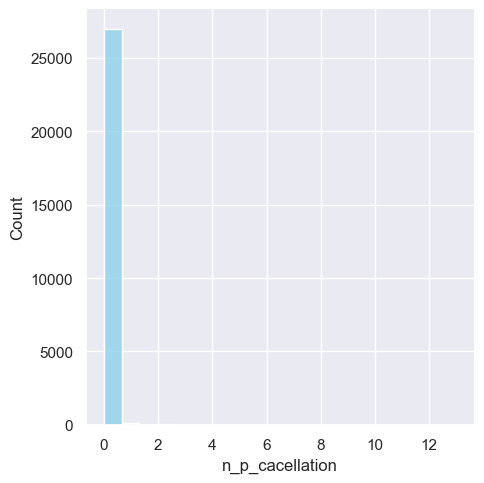

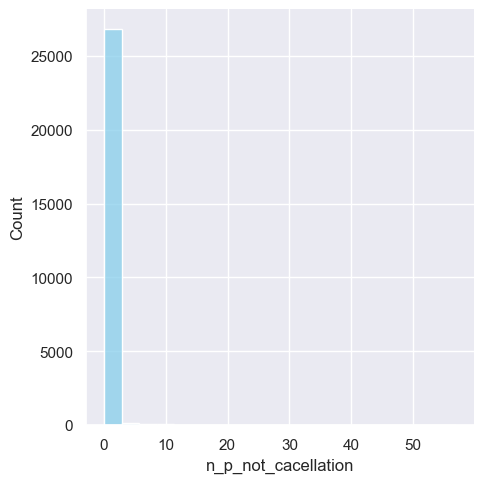

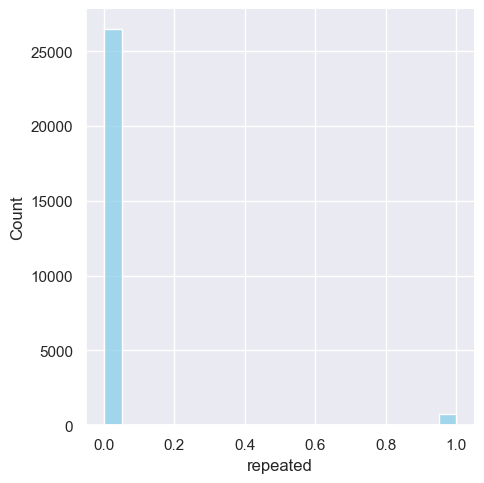

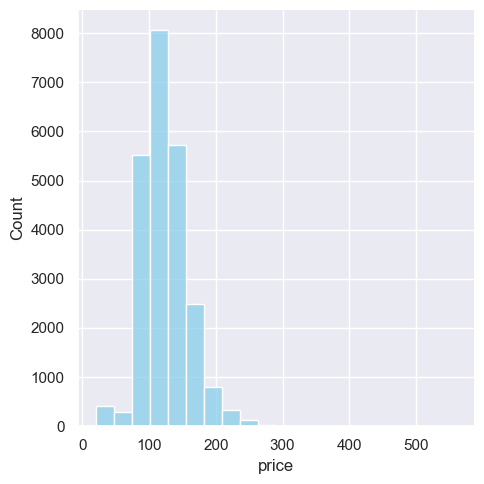

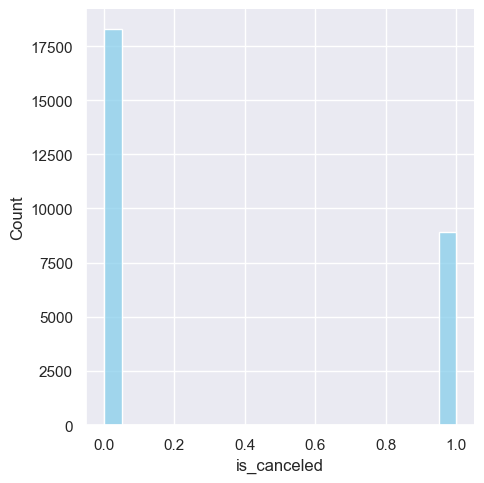

In [13]:
for col in numeric_col:
    sns.displot(df[col], bins=20, color='skyblue')

In [289]:
data = df
invalid_date_rows = data[data['date'] == '2018-2-29']
data['date'] = df['date'].replace('2018-2-29','02/28/2018')
data['date'].unique()


data['date']= pd.to_datetime(data['date'], format='%m/%d/%Y',errors='coerce')
data['date'].dtype

df['month'] = data['date'].dt.month
df['day'] = data['date'].dt.day
df['year'] = data['date'].dt.year
data

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month,day,year
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,...,Online,0,0,0,108.4,2018-11-28,0,11,28,2018
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,...,NaN,0,0,0,NaN,2018-11-03,1,11,3,2018
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,...,Online,0,0,0,137.3,2018-05-06,0,5,6,2018
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,...,Offline,0,0,0,127.0,2018-09-26,1,9,26,2018
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,...,Offline,0,0,0,110.0,2017-10-19,0,10,19,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,INN09056,1,2,Room_Type 1,NaN,3,0,0,0,1,...,NaN,0,0,0,NaN,2018-07-18,0,7,18,2018
27209,INN24796,0,4,Room_Type 1,half board,2,0,0,0,1,...,Online,0,0,0,113.0,2018-02-24,0,2,24,2018
27210,INN22554,0,2,Room_Type 1,NaN,2,0,0,0,0,...,Offline,0,0,0,105.0,2018-04-15,1,4,15,2018
27211,INN33957,1,0,Room_Type 4,half board,1,0,0,0,0,...,Aviation,0,0,0,130.0,2018-05-22,1,5,22,2018


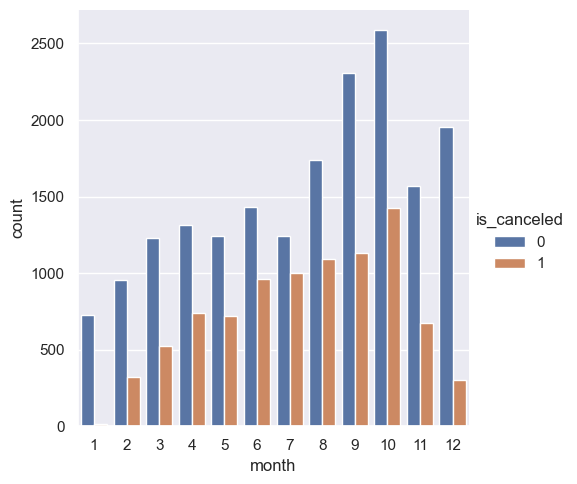

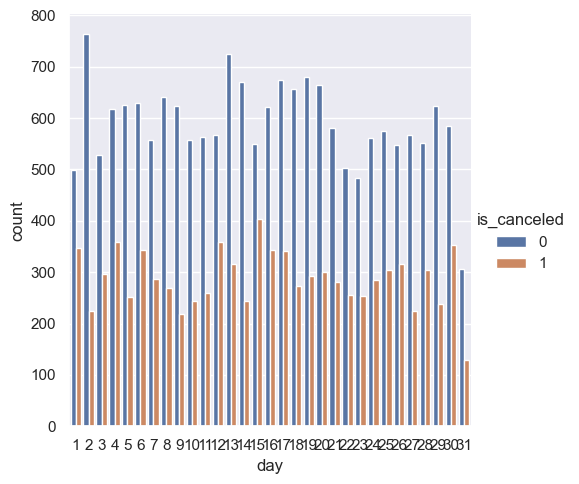

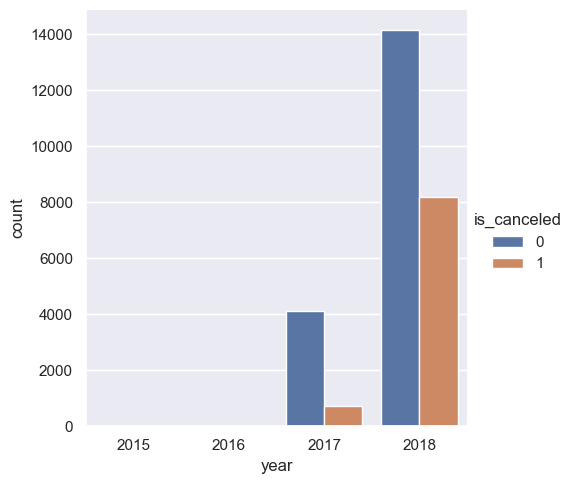

In [290]:
sns.catplot(x = 'month', kind = 'count', hue = 'is_canceled', data = data)
sns.catplot(x = 'day', kind = 'count', hue = 'is_canceled', data = data)
sns.catplot(x = 'year', kind = 'count', hue = 'is_canceled', data = data)

In [291]:
%matplotlib inline
sns.set(color_codes=True) 
sns.set(rc={'figure.figsize':(5,5)}) 

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   27213 non-null  object        
 1   weekend_nights       27213 non-null  int64         
 2   week_nights          27213 non-null  int64         
 3   room_type            27213 non-null  object        
 4   board_type           19045 non-null  object        
 5   n_adults             27213 non-null  int64         
 6   n_less_12            27213 non-null  int64         
 7   n_more_12            27213 non-null  int64         
 8   booked_tour          27213 non-null  int64         
 9   n_requests           27213 non-null  int64         
 10  lead_time            26794 non-null  float64       
 11  purchase_type        22366 non-null  object        
 12  n_p_cacellation      27213 non-null  int64         
 13  n_p_not_cacellation  27213 non-

,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled,month,day,year,room_type_cat,board_type_cat,purchase_type_cat
weekend_nights,1.000000,0.172582,0.106355,0.019048,0.020736,-0.033336,0.060688,0.045434,-0.023784,-0.029500,-0.072326,-0.000601,0.066571,-0.010714,0.027716,0.054034,0.060986,0.019542,0.038847
week_nights,0.172582,1.000000,0.105197,0.009291,0.020412,-0.052188,0.046046,0.149524,-0.027565,-0.048246,-0.100375,0.020085,0.093008,0.038114,-0.011855,0.026954,0.093326,0.018099,0.023021
n_adults,0.106355,0.105197,1.000000,-0.005528,-0.022964,0.009166,0.188380,0.096608,-0.046387,-0.124772,-0.199585,0.301024,0.087098,0.024353,0.029621,0.074005,0.270896,-0.012657,0.088055
n_less_12,0.019048,0.009291,-0.005528,1.000000,0.125932,0.036395,0.094793,-0.040479,-0.012620,-0.015822,-0.025912,0.257406,0.022208,-0.004160,0.018557,0.028867,0.276393,0.011050,0.028389
n_more_12,0.020736,0.020412,-0.022964,0.125932,1.000000,0.020203,0.099084,-0.033408,-0.012587,-0.017378,-0.029303,0.252388,0.023083,-0.002169,0.020117,0.036370,0.278152,0.015990,0.023280
booked_tour,-0.033336,-0.052188,0.009166,0.036395,0.020203,1.000000,0.091335,-0.062729,0.021167,0.068105,0.113914,0.057756,-0.086230,-0.017864,0.001160,0.015890,0.039589,0.011106,-0.007997
n_requests,0.060688,0.046046,0.188380,0.094793,0.099084,0.091335,1.000000,-0.099829,0.000753,0.030748,-0.009791,0.179417,-0.250765,0.109453,0.019879,0.056227,0.145410,0.020431,0.095061
lead_time,0.045434,0.149524,0.096608,-0.040479,-0.033408,-0.062729,-0.099829,1.000000,-0.047808,-0.080618,-0.139704,-0.063702,0.436932,0.138395,0.002840,0.143061,-0.106801,-0.047615,-0.002165
n_p_cacellation,-0.023784,-0.027565,-0.046387,-0.012620,-0.012587,0.021167,0.000753,-0.047808,1.000000,0.473422,0.384761,-0.062945,-0.036572,-0.034565,-0.013695,0.001002,-0.006050,0.015127,-0.014643
n_p_not_cacellation,-0.029500,-0.048246,-0.124772,-0.015822,-0.017378,0.068105,0.030748,-0.080618,0.473422,1.000000,0.545708,-0.120896,-0.062216,-0.011939,-0.006186,0.025911,-0.009804,0.022645,-0.062805


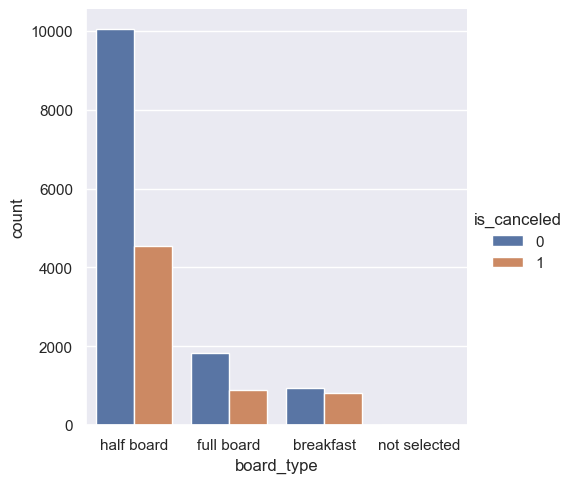

In [293]:
sns.catplot(x = 'board_type', kind = 'count', hue = 'is_canceled', data = df)

df['room_type_cat'] = df['room_type'].astype('category').cat.codes
df['board_type_cat'] = df['board_type'].astype('category').cat.codes
df['purchase_type_cat'] = df['purchase_type'].astype('category').cat.codes
df[df.describe().columns].corr(method = 'pearson')

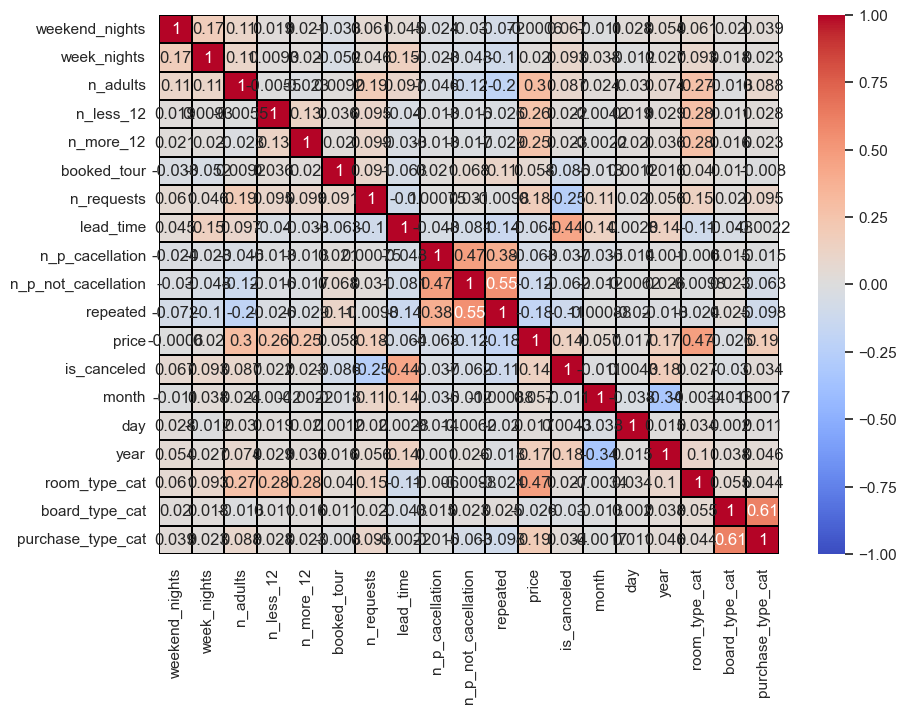

In [294]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')
# dont take correlation with target

In [295]:
s = df.board_type.value_counts(normalize=True)
print(s)
missing = df['board_type'].isnull()
df.loc[missing,'board_type'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
print(df)

half board      0.766133
full board      0.141612
breakfast       0.092045
not selected    0.000210
Name: board_type, dtype: float64
             ID  weekend_nights  week_nights    room_type  board_type  \
0      INN09588               1            5  Room_Type 1  half board   
1      INN07691               0            3  Room_Type 1  half board   
2      INN32192               0            2  Room_Type 4  half board   
3      INN32218               1            2  Room_Type 1  half board   
4      INN02994               1            3  Room_Type 4  half board   
...         ...             ...          ...          ...         ...   
27208  INN09056               1            2  Room_Type 1  full board   
27209  INN24796               0            4  Room_Type 1  half board   
27210  INN22554               0            2  Room_Type 1  half board   
27211  INN33957               1            0  Room_Type 4  half board   
27212  INN31744               0            2  Room_Type 1   brea

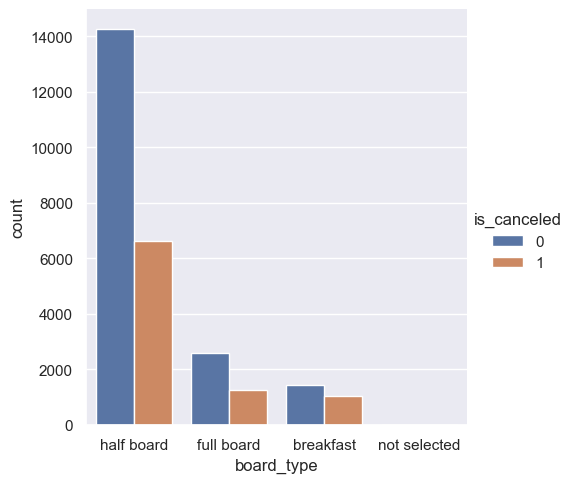

In [296]:
sns.catplot(x = 'board_type', kind = 'count', hue = 'is_canceled', data = df)

In [297]:
df.lead_time

0         34.0
1        365.0
2        148.0
3        502.0
4         32.0
         ...  
27208    106.0
27209     18.0
27210    147.0
27211      3.0
27212    328.0
Name: lead_time, Length: 27213, dtype: float64

0.0      0.036687
2.0      0.029932
3.0      0.017765
4.0      0.017019
5.0      0.016907
           ...   
374.0    0.000037
360.0    0.000037
382.0    0.000037
418.0    0.000037
410.0    0.000037
Name: lead_time, Length: 350, dtype: float64


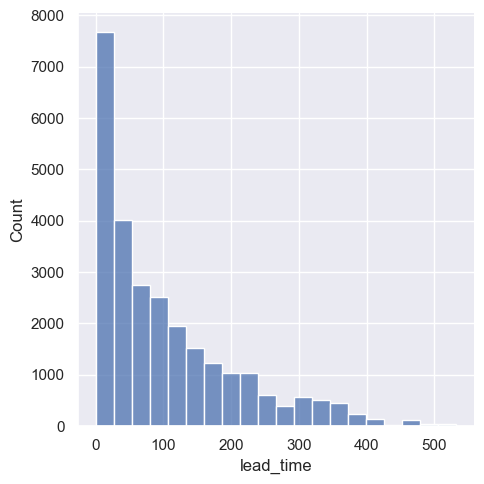

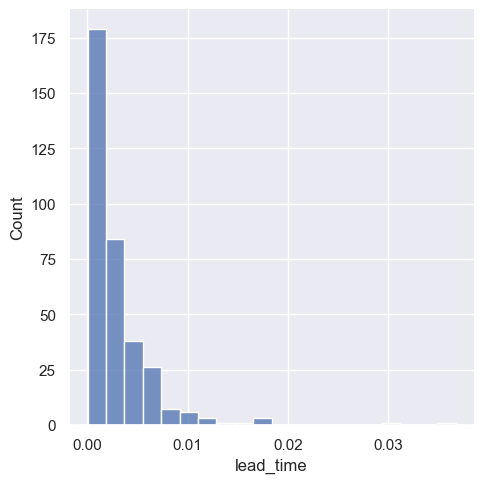

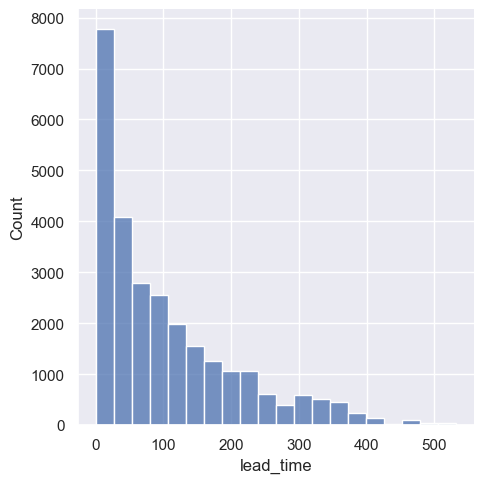

In [298]:
# correlations dont appear to be significant enough so we will fill lead_time in with mean.
s = df.lead_time.value_counts(normalize=True)
print(s)
sns.displot(df['lead_time'], bins = 20)
sns.displot(s, bins = 20)
# sns.displot(df[col], bins=20, color='skyblue')
missing = df['lead_time'].isnull()
df.loc[missing,'lead_time'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
sns.displot(df['lead_time'], bins = 20)

In [299]:
df['purchase_type'].unique()

array(['Online', nan, 'Offline', 'Corporate', 'Complementary', 'Aviation'],
      dtype=object)

Online           0.639632
Offline          0.290664
Corporate        0.055352
Complementary    0.010909
Aviation         0.003443
Name: purchase_type, dtype: float64


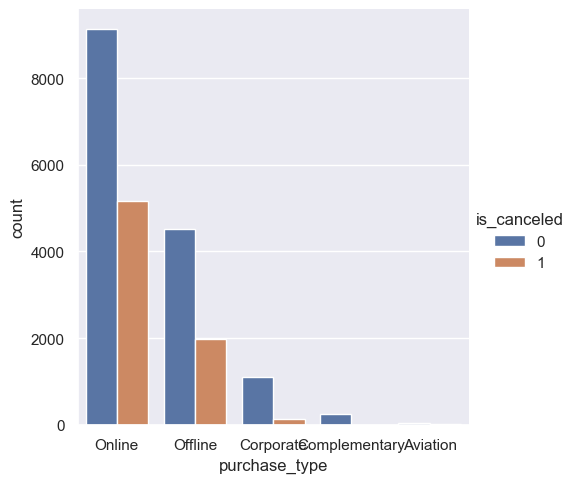

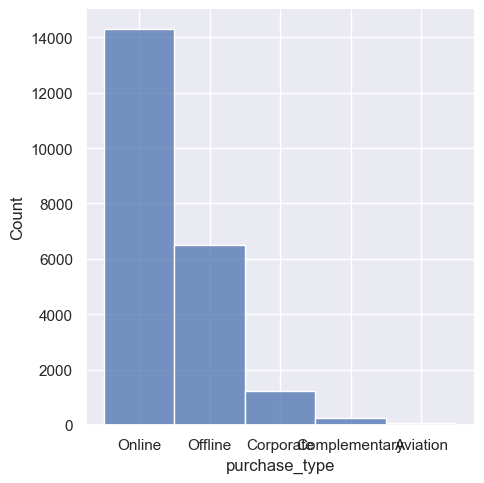

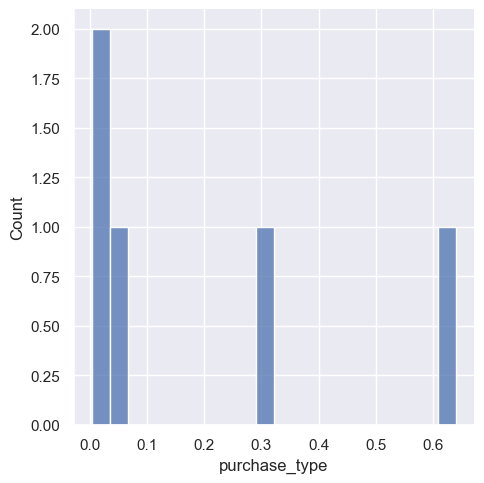

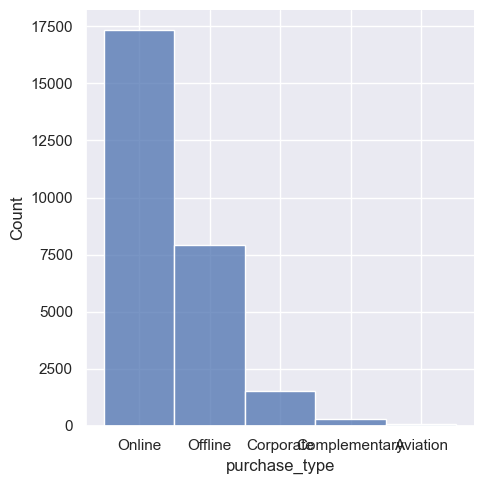

In [300]:
sns.catplot(x = 'purchase_type', kind = 'count', hue = 'is_canceled', data = df)
s = df.purchase_type.value_counts(normalize=True)
print(s)
sns.displot(df['purchase_type'], bins = 20)
sns.displot(s, bins = 20)
# sns.displot(df[col], bins=20, color='skyblue')
missing = df['purchase_type'].isnull()
df.loc[missing,'purchase_type'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
sns.displot(df['purchase_type'], bins = 20)

For class  Room_Type 1  the median is  114.5
For class  Room_Type 1  the mean is  115.8866113821142
and the number of missing values is  2634 out of  21084 rows
For class  Room_Type 2  the median is  105.85499999999999
For class  Room_Type 2  the mean is  108.92675438596494
and the number of missing values is  55 out of  511 rows
For class  Room_Type 3  the median is  100.75
For class  Room_Type 3  the mean is  111.91666666666667
and the number of missing values is  0 out of  3 rows
For class  Room_Type 4  the median is  147.65
For class  Room_Type 4  the mean is  145.54636477671886
and the number of missing values is  585 out of  4571 rows
For class  Room_Type 5  the median is  139.4
For class  Room_Type 5  the mean is  143.66717948717954
and the number of missing values is  24 out of  180 rows
For class  Room_Type 6  the median is  200.2
For class  Room_Type 6  the mean is  200.2548049921996
and the number of missing values is  100 out of  741 rows
For class  Room_Type 7  the median 

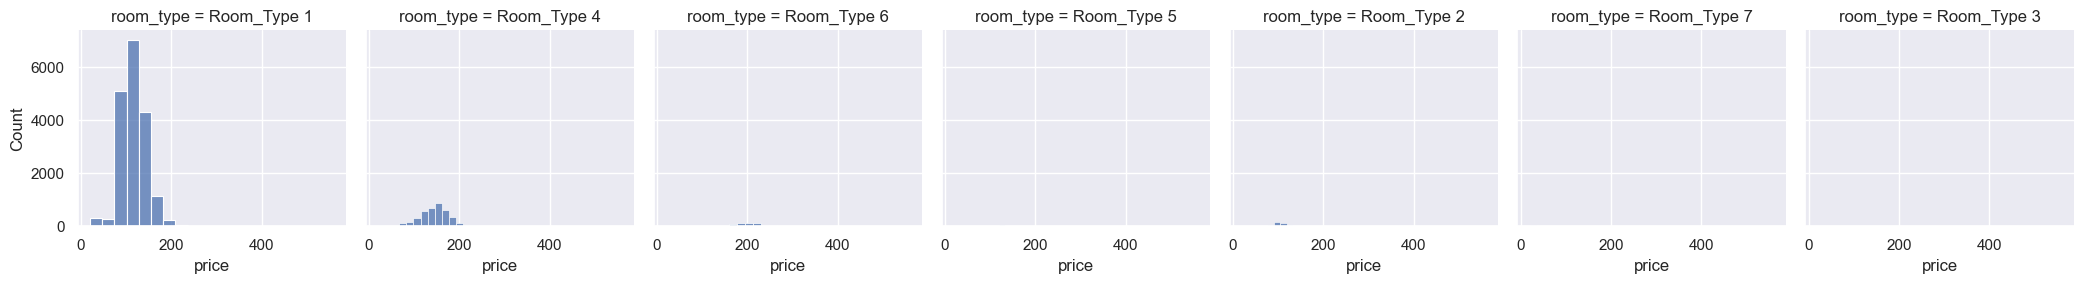

In [301]:
g = sns.FacetGrid(df, col="room_type")
g.map_dataframe(sns.histplot, x="price", bins=20)
for i in sorted(df['room_type'].unique()):
    print('For class ', i, ' the median is ', df.loc[df['room_type']==i , 'price'].median())
    print('For class ', i, ' the mean is ', df.loc[df['room_type']==i , 'price'].mean())
    print('and the number of missing values is ', df.loc[df['room_type']==i , 'price'].isnull().sum(), 
          'out of ',(df['room_type']==i).sum(), 'rows')
    
  
for room in df.room_type.unique():
    mu = df.loc[df['room_type']==room, 'price'].mean()
    sigma = df.loc[df['room_type']==room , 'price'].std()
    room_data = df['room_type']==room
    missing_price = df['price'].isnull()
    df.loc[missing_price & room_data, 'price'] = np.random.normal(mu, sigma, len(df[missing_price & room_data]))



218.900000    31
227.900000    27
197.300000    22
173.000000    22
206.300000    18
              ..
327.274521     1
170.070000     1
215.554953     1
223.760000     1
244.330000     1
Name: price, Length: 400, dtype: int64

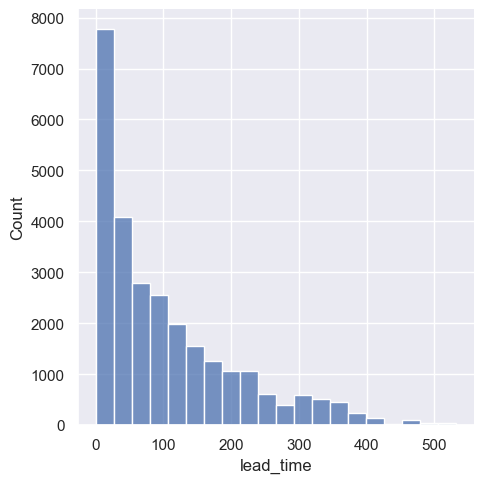

In [302]:
sns.displot(df['lead_time'],  bins = 20)
df[df['room_type']=='Room_Type 6'].price.value_counts()

min_value: 0.0
max_value: 532.0
[  0.         177.33333333 354.66666667 532.        ]


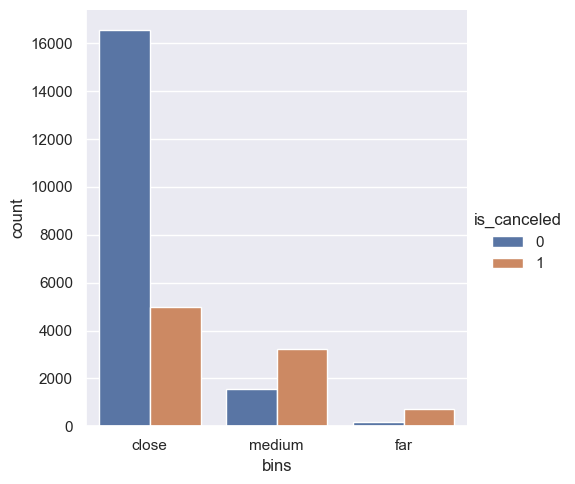

In [381]:
df.lead_time.unique()
min_value = df['lead_time'].min()
max_value = df['lead_time'].max()
print(f'min_value: {min_value}')
print(f'max_value: {max_value}')
bins = np.linspace(min_value, max_value, 4)
print(bins)

sns.catplot(x = 'bins', kind = 'count', hue = 'is_canceled', data = df)

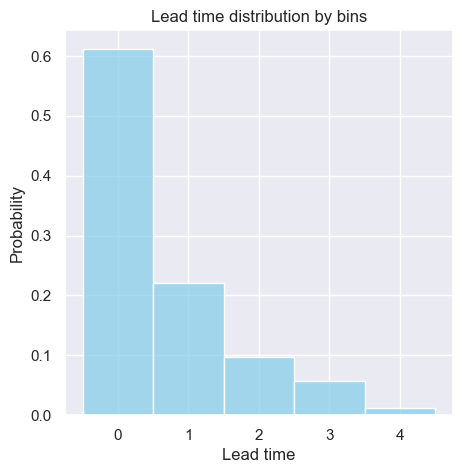

In [382]:
bins = [0, 100, 200, 300, 400, float('inf')]
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=bins, labels=False, include_lowest=True)

df['lead_time_bin'].value_counts().sort_index()

sns.histplot(data=df, x='lead_time_bin', color='skyblue', stat="probability", discrete=True)
plt.title('Lead time distribution by bins')
plt.xlabel('Lead time')
plt.ylabel('Probability')
plt.show()

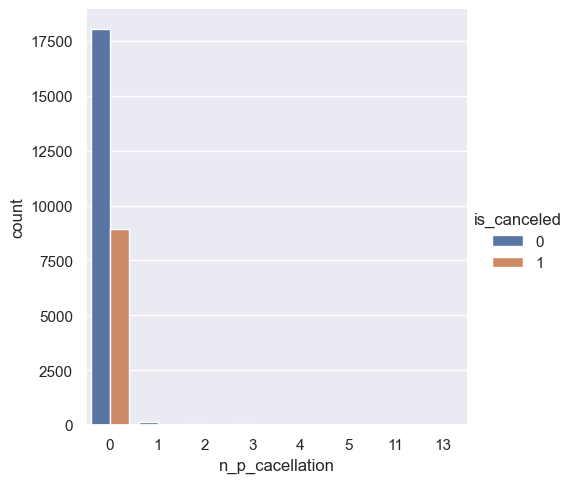

In [305]:
sns.catplot(x = 'n_p_cacellation', kind = 'count', hue = 'is_canceled', data = df)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   27213 non-null  object        
 1   weekend_nights       27213 non-null  int64         
 2   week_nights          27213 non-null  int64         
 3   room_type            27213 non-null  object        
 4   board_type           27213 non-null  object        
 5   n_adults             27213 non-null  int64         
 6   n_less_12            27213 non-null  int64         
 7   n_more_12            27213 non-null  int64         
 8   booked_tour          27213 non-null  int64         
 9   n_requests           27213 non-null  int64         
 10  lead_time            27213 non-null  float64       
 11  purchase_type        27213 non-null  object        
 12  n_p_cacellation      27213 non-null  int64         
 13  n_p_not_cacellation  27213 non-

In [307]:
df['n_p_cacellation'].unique()

array([ 0,  1,  3,  2,  4, 11,  5, 13], dtype=int64)

In [308]:
df[df['weekend_nights']==6]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,date,is_canceled,month,day,year,room_type_cat,board_type_cat,purchase_type_cat,bins,lead_time_bin
2879,INN27131,6,12,Room_Type 1,half board,1,0,0,0,1,...,2018-11-18,1,11,18,2018,0,-1,-1,close,0
5236,INN02711,6,13,Room_Type 1,full board,2,0,0,0,0,...,2018-03-10,1,3,10,2018,0,1,4,close,0
7579,INN00540,6,15,Room_Type 4,half board,1,0,0,0,0,...,2018-03-30,1,3,30,2018,3,2,4,close,0
9577,INN14276,6,14,Room_Type 1,half board,1,0,0,0,0,...,2018-02-05,1,2,5,2018,0,-1,-1,close,0
9659,INN02297,6,14,Room_Type 1,half board,1,0,0,0,0,...,2018-11-20,1,11,20,2018,0,2,4,close,0
9916,INN32188,6,13,Room_Type 1,full board,2,0,0,0,0,...,2018-08-20,1,8,20,2018,0,1,4,close,1
14725,INN19746,6,16,Room_Type 4,half board,1,0,0,0,1,...,2018-03-03,1,3,3,2018,3,-1,4,close,0
16549,INN17939,6,15,Room_Type 1,half board,1,0,0,0,0,...,2018-04-13,1,4,13,2018,0,2,2,close,0
20194,INN18161,6,12,Room_Type 1,half board,1,0,0,0,0,...,2018-08-28,1,8,28,2018,0,-1,-1,close,1
20377,INN35200,6,14,Room_Type 1,half board,1,0,0,0,1,...,2018-01-10,0,1,10,2018,0,-1,4,close,0


In [309]:
df['Num_Children'] = df['n_less_12'] + df['n_more_12']

In [310]:
df['Num_Children'].value_counts()

0     25168
1      1217
2       814
3        13
10        1
Name: Num_Children, dtype: int64

In [311]:
df[df['Num_Children']==10]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,is_canceled,month,day,year,room_type_cat,board_type_cat,purchase_type_cat,bins,lead_time_bin,Num_Children
14485,INN06339,0,2,Room_Type 4,half board,2,6,4,0,1,...,0,1,12,2018,3,-1,-1,close,0,10


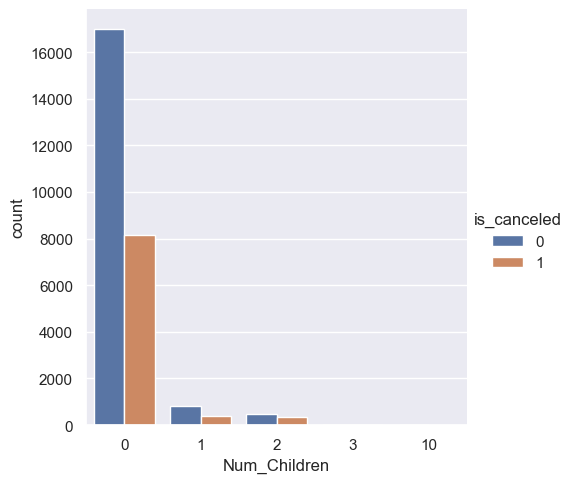

In [312]:
sns.catplot(x = 'Num_Children', kind = 'count', hue = 'is_canceled', data = df)

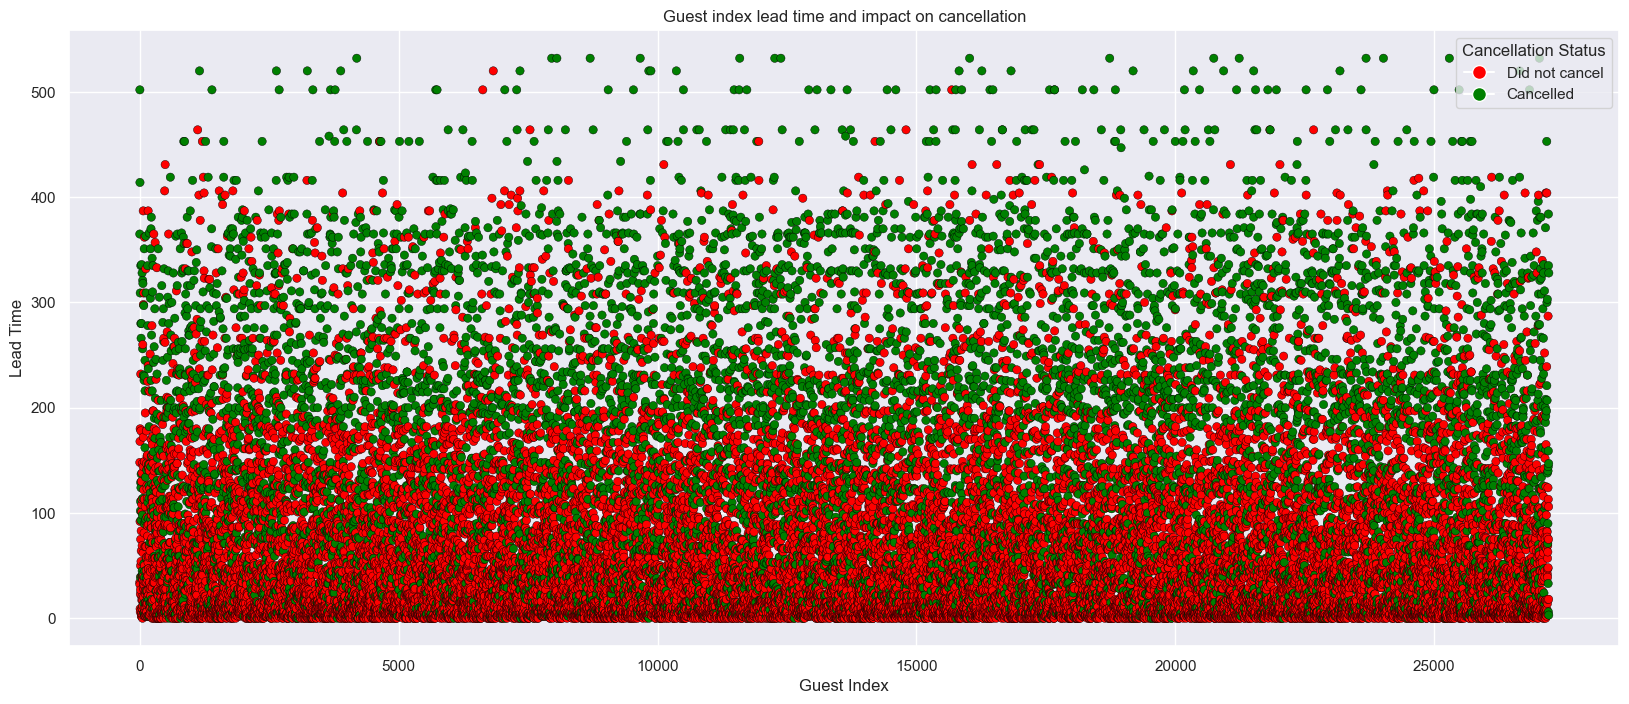

In [313]:
colordict = {0: 'red', 1: 'green'}
plt.figure(figsize=(20, 8))
scatter = plt.scatter(df.index, df['lead_time'], c=df['is_canceled'].map(colordict),  edgecolors='black', linewidths=0.3)
plt.title('Guest index lead time and impact on cancellation')
plt.xlabel('Guest Index')
plt.ylabel('Lead Time')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Did not cancel',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Cancelled',
                              markerfacecolor='green', markersize=10)]

plt.legend(handles=legend_elements, title='Cancellation Status', loc='upper right')
plt.show()

In [314]:

dict_room = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}

# Print the dictionary
print(dict_room)

# Remap the values of the dataframe
df['room_type_relabel'] = df['room_type'].map(dict_room)
df.room_type_relabel

dict_board = {'half board': 1, 'full board': 2, 'breakfast': 3, 'not selected': 4}

# Print the dictionary
print(dict_board)

# Remap the values of the dataframe
df['board_type_relabel'] = df['board_type'].map(dict_board)
df.board_type_relabel

dict_purchase = {'Online': 1, 'Offline': 2, 'Corporate': 3, 'Aviation': 4, 'Complementary': 5}

# Print the dictionary
print(dict_purchase)

# Remap the values of the dataframe
df['purchase_type_relabel'] = df['purchase_type'].map(dict_purchase)
df.purchase_type_relabel

{'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}
{'half board': 1, 'full board': 2, 'breakfast': 3, 'not selected': 4}
{'Online': 1, 'Offline': 2, 'Corporate': 3, 'Aviation': 4, 'Complementary': 5}


0        1
1        2
2        1
3        2
4        2
        ..
27208    1
27209    1
27210    2
27211    4
27212    2
Name: purchase_type_relabel, Length: 27213, dtype: int64

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     27213 non-null  object        
 1   weekend_nights         27213 non-null  int64         
 2   week_nights            27213 non-null  int64         
 3   room_type              27213 non-null  object        
 4   board_type             27213 non-null  object        
 5   n_adults               27213 non-null  int64         
 6   n_less_12              27213 non-null  int64         
 7   n_more_12              27213 non-null  int64         
 8   booked_tour            27213 non-null  int64         
 9   n_requests             27213 non-null  int64         
 10  lead_time              27213 non-null  float64       
 11  purchase_type          27213 non-null  object        
 12  n_p_cacellation        27213 non-null  int64         
 13  n

In [316]:
data_mean = df['price'].mean()
data_std = df['price'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['price'] > upper_bound) | (df['price'] < lower_bound)]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,year,room_type_cat,board_type_cat,purchase_type_cat,bins,lead_time_bin,Num_Children,room_type_relabel,board_type_relabel,purchase_type_relabel
13,INN15451,2,5,Room_Type 6,breakfast,2,1,1,0,0,...,2018,5,0,4,close,0,2,6,3,1
14,INN10191,1,3,Room_Type 6,half board,2,0,2,0,0,...,2018,5,2,4,close,1,2,6,1,1
98,INN21633,1,0,Room_Type 4,half board,3,0,0,0,1,...,2018,3,2,4,close,0,0,4,1,1
183,INN33956,1,2,Room_Type 4,full board,2,0,0,0,0,...,2018,3,-1,4,close,0,0,4,2,1
214,INN13372,0,1,Room_Type 6,half board,2,0,2,0,0,...,2018,5,-1,-1,close,0,2,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,INN15141,0,1,Room_Type 4,half board,2,0,0,0,0,...,2018,3,2,4,close,0,0,4,1,1
26586,INN14762,2,5,Room_Type 4,breakfast,3,0,0,0,2,...,2018,3,0,4,close,1,0,4,3,1
26888,INN28220,0,2,Room_Type 4,breakfast,3,0,0,1,2,...,2018,3,0,4,close,0,0,4,3,1
26968,INN21342,2,1,Room_Type 6,half board,2,0,2,0,0,...,2018,5,2,4,close,0,2,6,1,1


In [317]:
import sklearn

[-50.8011574]
[560.]


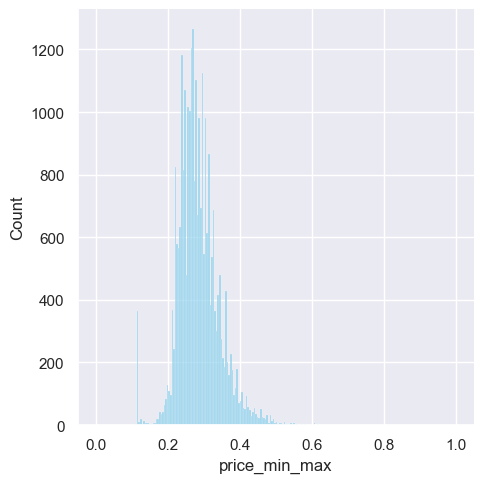

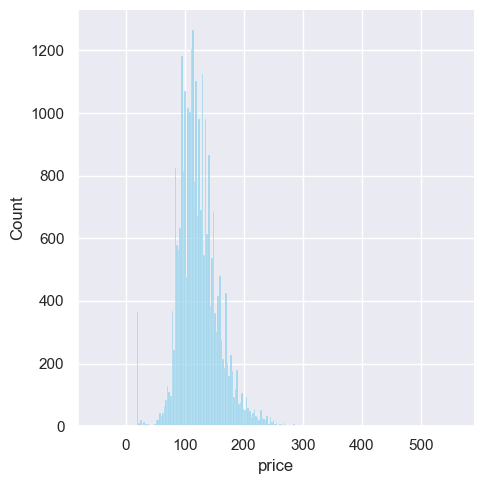

In [318]:
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['price']))
df['price_min_max'] = scaler.transform(pd.DataFrame(df['price']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['price','price_min_max']].head()

sns.displot(df['price_min_max'], color='skyblue')
sns.displot(df['price'], color='skyblue')

0   -0.666429
1    2.533644
2    0.435711
3    3.858146
4   -0.685765
Name: lead_time_norm, dtype: float64


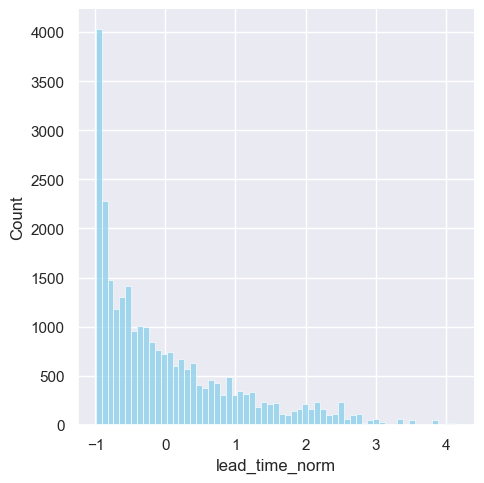

In [319]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df['lead_time']))
df['lead_time_norm'] = z_scaler.transform(pd.DataFrame(df['lead_time']))
print(df['lead_time_norm'].head())
sns.displot(df['lead_time_norm'], color='skyblue')


In [325]:
df1 = df[['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12',
       'booked_tour', 'n_requests', 'lead_time_norm', 'n_p_cacellation',
       'n_p_not_cacellation', 'repeated', 'price_min_max', 'room_type_relabel', 'board_type_relabel', 'purchase_type_relabel']]

In [326]:
df1.head()

,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time_norm,n_p_cacellation,n_p_not_cacellation,repeated,price_min_max,room_type_relabel,board_type_relabel,purchase_type_relabel
0,1,5,2,0,0,0,2,-0.666429,0,0,0,0.260643,1,1,1
1,0,3,2,0,0,0,0,2.533644,0,0,0,0.247150,1,1,2
2,0,2,1,0,0,0,1,0.435711,0,0,0,0.307958,4,1,1
3,1,2,2,0,0,0,0,3.858146,0,0,0,0.291095,1,1,2
4,1,3,2,0,1,0,2,-0.685765,0,0,0,0.263263,4,1,2


In [327]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(df1, y='is_canceled')
df2 = pd.DataFrame(pca.transform(df1))


In [328]:
pca.explained_variance_ratio_

array([0.28545905, 0.2062629 , 0.17369586, 0.08674779, 0.06984085,
       0.05923978, 0.03836771, 0.03530721, 0.02020414, 0.00857666,
       0.00608098, 0.00577328, 0.00280794, 0.00143754])

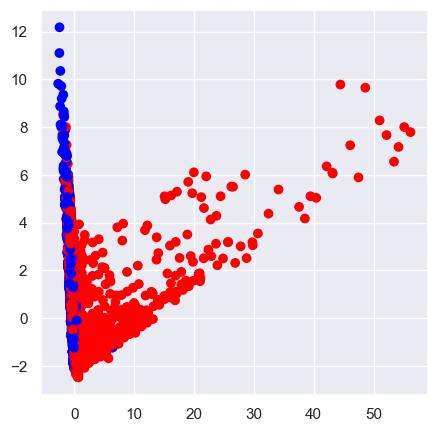

In [329]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(df2[0], df2[1], c = df['is_canceled'].map(colordict))

In [383]:
target = pd.DataFrame(df['is_canceled'])

train_data = df.drop(['ID', 'is_canceled', 'room_type_cat', 'board_type_cat', 'purchase_type_cat'], axis=1)
train_data

,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,...,day,year,bins,lead_time_bin,Num_Children,room_type_relabel,board_type_relabel,purchase_type_relabel,price_min_max,lead_time_norm
0,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,...,28,2018,close,0,0,1,1,1,0.260643,-0.666429
1,0,3,Room_Type 1,half board,2,0,0,0,0,365.0,...,3,2018,far,3,0,1,1,2,0.247150,2.533644
2,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,...,6,2018,close,1,0,4,1,1,0.307958,0.435711
3,1,2,Room_Type 1,half board,2,0,0,0,0,502.0,...,26,2018,far,4,0,1,1,2,0.291095,3.858146
4,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,...,19,2017,close,0,1,4,1,2,0.263263,-0.685765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,1,2,Room_Type 1,full board,3,0,0,0,1,106.0,...,18,2018,close,1,0,1,2,1,0.227068,0.029659
27209,0,4,Room_Type 1,half board,2,0,0,0,1,18.0,...,24,2018,close,0,0,1,1,1,0.268174,-0.821116
27210,0,2,Room_Type 1,half board,2,0,0,0,0,147.0,...,15,2018,close,1,0,1,1,2,0.255077,0.426043
27211,1,0,Room_Type 4,half board,1,0,0,0,0,3.0,...,22,2018,close,0,0,4,1,4,0.296007,-0.966134


In [338]:
test_data = pd.read_csv("C:/Users/user/OneDrive - Bar-Ilan University - Students/Documents/Data_mining/Final_Project/hotels_test.csv")

In [334]:
test_data

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
0,INN16062,0,2,Room_Type 4,NaN,2,1,0,0,1,132.0,Online,0,0,0,141.59,5/13/2018
1,INN09467,0,2,Room_Type 2,half board,1,0,0,0,0,159.0,Online,0,0,0,90.56,8/30/2018
2,INN07689,1,4,Room_Type 7,NaN,3,0,0,0,2,32.0,NaN,0,0,0,NaN,9/28/2018
3,INN28642,2,1,Room_Type 1,NaN,2,0,0,0,0,38.0,NaN,0,0,0,NaN,09/11/2018
4,INN34082,1,4,Room_Type 1,half board,2,0,0,0,1,88.0,Online,0,0,0,99.05,3/16/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,INN09811,0,3,Room_Type 1,NaN,2,0,0,0,1,326.0,NaN,0,0,0,NaN,9/21/2018
9068,INN33359,0,1,Room_Type 1,half board,1,0,0,0,0,10.0,Corporate,0,0,0,85.00,9/15/2017
9069,INN26843,0,3,Room_Type 1,half board,1,0,0,0,1,125.0,Online,0,0,0,130.10,05/04/2018
9070,INN14826,0,1,Room_Type 1,NaN,2,0,0,0,2,183.0,NaN,0,0,0,NaN,8/20/2018


In [340]:
data = test_data
invalid_date_rows = data[data['date'] == '2018-2-29']
data['date'] = df['date'].replace('2018-2-29','02/28/2018')
data['date'].unique()


data['date']= pd.to_datetime(data['date'], format='%m/%d/%Y',errors='coerce')
data['date'].dtype

test_data['month'] = data['date'].dt.month
test_data['day'] = data['date'].dt.day
test_data['year'] = data['date'].dt.year
test_data

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,month,day,year
0,INN16062,0,2,Room_Type 4,NaN,2,1,0,0,1,132.0,Online,0,0,0,141.59,2018-11-28,11,28,2018
1,INN09467,0,2,Room_Type 2,half board,1,0,0,0,0,159.0,Online,0,0,0,90.56,2018-11-03,11,3,2018
2,INN07689,1,4,Room_Type 7,NaN,3,0,0,0,2,32.0,NaN,0,0,0,NaN,2018-05-06,5,6,2018
3,INN28642,2,1,Room_Type 1,NaN,2,0,0,0,0,38.0,NaN,0,0,0,NaN,2018-09-26,9,26,2018
4,INN34082,1,4,Room_Type 1,half board,2,0,0,0,1,88.0,Online,0,0,0,99.05,2017-10-19,10,19,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,INN09811,0,3,Room_Type 1,NaN,2,0,0,0,1,326.0,NaN,0,0,0,NaN,2018-12-15,12,15,2018
9068,INN33359,0,1,Room_Type 1,half board,1,0,0,0,0,10.0,Corporate,0,0,0,85.00,2018-08-27,8,27,2018
9069,INN26843,0,3,Room_Type 1,half board,1,0,0,0,1,125.0,Online,0,0,0,130.10,2017-08-14,8,14,2017
9070,INN14826,0,1,Room_Type 1,NaN,2,0,0,0,2,183.0,NaN,0,0,0,NaN,2018-09-10,9,10,2018


In [353]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   9072 non-null   object        
 1   weekend_nights       9072 non-null   int64         
 2   week_nights          9072 non-null   int64         
 3   room_type            9072 non-null   object        
 4   board_type           9072 non-null   object        
 5   n_adults             9072 non-null   int64         
 6   n_less_12            9072 non-null   int64         
 7   n_more_12            9072 non-null   int64         
 8   booked_tour          9072 non-null   int64         
 9   n_requests           9072 non-null   int64         
 10  lead_time            9072 non-null   float64       
 11  purchase_type        9072 non-null   object        
 12  n_p_cacellation      9072 non-null   int64         
 13  n_p_not_cacellation  9072 non-nul

In [363]:
df['room_type_cat'] = df['room_type'].astype('category').cat.codes
df['board_type_cat'] = df['board_type'].astype('category').cat.codes
df['purchase_type_cat'] = df['purchase_type'].astype('category').cat.codes


In [364]:
s = test_data.board_type.value_counts(normalize=True)
missing = test_data['board_type'].isnull()
test_data.loc[missing,'board_type'] = np.random.choice(s.index, size=len(test_data[missing]),p=s.values)

In [365]:
s = test_data.lead_time.value_counts(normalize=True)
missing = test_data['lead_time'].isnull()
test_data.loc[missing,'lead_time'] = np.random.choice(s.index, size=len(test_data[missing]),p=s.values)


In [366]:

s = test_data.purchase_type.value_counts(normalize=True)
missing = test_data['purchase_type'].isnull()
test_data.loc[missing,'purchase_type'] = np.random.choice(s.index, size=len(test_data[missing]),p=s.values)

In [367]:
for room in test_data.room_type.unique():
    mu = test_data.loc[test_data['room_type']==room, 'price'].mean()
    sigma = test_data.loc[test_data['room_type']==room , 'price'].std()
    room_data = test_data['room_type']==room
    missing_price = test_data['price'].isnull()
    test_data.loc[missing_price & room_data, 'price'] = np.random.normal(mu, sigma, len(test_data[missing_price & room_data]))

In [368]:
test_data.lead_time.unique()
min_value = test_data['lead_time'].min()
max_value = test_data['lead_time'].max()

bins = np.linspace(min_value, max_value, 4)

labels = ['close', 'medium', 'far']
test_data['bins'] = pd.cut(test_data['lead_time'], bins=bins, labels=labels, 
                    include_lowest=True)


In [369]:
bins = [0, 100, 200, 300, 400, float('inf')]
test_data['lead_time_bin'] = pd.cut(test_data['lead_time'], bins=bins, labels=False, include_lowest=True)
test_data['lead_time_bin'].value_counts().sort_index()

0    5661
1    1919
2     865
3     530
4      97
Name: lead_time_bin, dtype: int64

In [370]:
test_data['Num_Children'] = test_data['n_less_12'] + test_data['n_more_12']

In [371]:

dict_room = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}

# Print the dictionary
print(dict_room)

# Remap the values of the dataframe
test_data['room_type_relabel'] = test_data['room_type'].map(dict_room)
test_data.room_type_relabel

dict_board = {'half board': 1, 'full board': 2, 'breakfast': 3, 'not selected': 4}

# Print the dictionary
print(dict_board)

# Remap the values of the dataframe
test_data['board_type_relabel'] = test_data['board_type'].map(dict_board)
test_data.board_type_relabel

dict_purchase = {'Online': 1, 'Offline': 2, 'Corporate': 3, 'Aviation': 4, 'Complementary': 5}

# Print the dictionary
print(dict_purchase)

# Remap the values of the dataframe
test_data['purchase_type_relabel'] = test_data['purchase_type'].map(dict_purchase)
test_data.purchase_type_relabel

{'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}
{'half board': 1, 'full board': 2, 'breakfast': 3, 'not selected': 4}
{'Online': 1, 'Offline': 2, 'Corporate': 3, 'Aviation': 4, 'Complementary': 5}


0       1
1       1
2       1
3       1
4       1
       ..
9067    2
9068    3
9069    1
9070    1
9071    2
Name: purchase_type_relabel, Length: 9072, dtype: int64

In [372]:
data_mean = test_data['price'].mean()
data_std = test_data['price'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
test_data.loc[(df['price'] > upper_bound) | (test_data['price'] < lower_bound)]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,date,month,day,year,bins,lead_time_bin,Num_Children,room_type_relabel,board_type_relabel,purchase_type_relabel
13,INN00481,0,2,Room_Type 1,half board,1,0,0,0,0,...,2018-04-16,4,16,2018,medium,2,0,1,1,1
14,INN31132,0,2,Room_Type 4,full board,1,0,0,0,0,...,2018-09-22,9,22,2018,close,0,0,4,2,4
98,INN17761,2,4,Room_Type 1,half board,2,0,0,0,0,...,2018-08-15,8,15,2018,close,1,0,1,1,1
183,INN10205,1,0,Room_Type 1,half board,2,0,0,0,0,...,2018-12-30,12,30,2018,close,0,0,1,1,1
214,INN15429,1,0,Room_Type 1,full board,2,0,0,0,0,...,2018-08-19,8,19,2018,close,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,INN26125,2,2,Room_Type 1,full board,2,0,0,0,2,...,2017-09-23,9,23,2017,close,0,0,1,2,1
8736,INN29362,2,5,Room_Type 1,half board,2,0,0,0,2,...,2018-08-07,8,7,2018,close,1,0,1,1,1
8798,INN18203,0,1,Room_Type 1,half board,2,0,0,0,1,...,2018-04-30,4,30,2018,close,1,0,1,1,1
8890,INN23468,0,2,Room_Type 1,breakfast,1,0,0,0,0,...,2018-09-25,9,25,2018,close,0,0,1,3,2


In [373]:

scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(test_data['price']))
test_data['price_min_max'] = scaler.transform(pd.DataFrame(test_data['price']))

test_data[['price','price_min_max']].head()


,price,price_min_max
0,141.590000,0.397025
1,90.560000,0.270613
2,236.419327,0.631936
3,119.754760,0.342934
4,99.050000,0.291644


In [376]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(test_data['lead_time']))
test_data['lead_time_norm'] = z_scaler.transform(pd.DataFrame(test_data['lead_time']))


In [377]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     9072 non-null   object        
 1   weekend_nights         9072 non-null   int64         
 2   week_nights            9072 non-null   int64         
 3   room_type              9072 non-null   object        
 4   board_type             9072 non-null   object        
 5   n_adults               9072 non-null   int64         
 6   n_less_12              9072 non-null   int64         
 7   n_more_12              9072 non-null   int64         
 8   booked_tour            9072 non-null   int64         
 9   n_requests             9072 non-null   int64         
 10  lead_time              9072 non-null   float64       
 11  purchase_type          9072 non-null   object        
 12  n_p_cacellation        9072 non-null   int64         
 13  n_p

In [378]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   weekend_nights         27213 non-null  int64         
 1   week_nights            27213 non-null  int64         
 2   room_type              27213 non-null  object        
 3   board_type             27213 non-null  object        
 4   n_adults               27213 non-null  int64         
 5   n_less_12              27213 non-null  int64         
 6   n_more_12              27213 non-null  int64         
 7   booked_tour            27213 non-null  int64         
 8   n_requests             27213 non-null  int64         
 9   lead_time              27213 non-null  float64       
 10  purchase_type          27213 non-null  object        
 11  n_p_cacellation        27213 non-null  int64         
 12  n_p_not_cacellation    27213 non-null  int64         
 13  r

In [380]:
test_data.lead_time_bin          

0       1
1       1
2       0
3       0
4       0
       ..
9067    3
9068    0
9069    1
9070    1
9071    0
Name: lead_time_bin, Length: 9072, dtype: int64